In [1]:
from ddot import Ontology
import ddot
ont2 = Ontology.from_table('/home/hermuba/data0118/network1122/candidate_ontologies')

/home/hermuba/miniconda3/envs/ddot/lib/python3.6/site-packages/ddot/Ontology.py:1606: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  table = pd.read_table(table, comment='#', header=header)


In [34]:
# put phenotype here
import pandas as pd
pheno = pd.read_csv('/home/hermuba/data0118/ontologies/phenotype_cluster.csv', header = None, index_col = 0, names = ['phenotype cluster'])

In [35]:
# put gene index of the ontology into pheno
i = 0
for g_index in ont2.genes:
    pheno.loc[g_index, 'gene index'] = i
    i+= 1

In [36]:
# make gene index
pheno.reset_index(inplace = True)
pheno.set_index('gene index', inplace = True)

In [37]:
pheno.head()

,index,phenotype cluster
gene index,,
0.0,562.10576.con.0008_20|562.10576,9
1.0,562.10576.con.0029_46|562.10576,1
2.0,562.10576.con.0045_7|562.10576,3
3.0,562.10576.con.0045_9|562.10576,3
4.0,562.10576.con.0047_4|562.10576,9


In [79]:
pheno.groupby(by = 'phenotype cluster').count()

,index
phenotype cluster,
1,2
2,14
3,5
4,75
5,108
6,107
7,3
8,3
9,121


In [38]:
ont2.term_2_gene.keys() # we can perform enrichment on this? # number is 0 based index in ont.genes; only genes "directly connect to that term"

dict_keys(['S:791', 'S:721', 'S:779', 'S:655', 'S:777', 'S:660', 'S:583', 'S:678', 'S:781', 'S:784', 'S:668', 'S:570', 'S:769', 'S:651', 'S:670', 'S:778', 'S:755', 'S:772', 'S:686', 'S:672', 'S:580', 'S:604', 'S:706', 'S:590', 'S:684', 'S:560', 'S:600', 'S:703', 'S:638', 'S:761', 'S:596', 'S:598', 'S:613', 'S:588', 'S:566', 'S:654', 'S:701', 'S:786', 'S:759', 'S:705', 'S:793', 'S:780', 'S:760', 'S:606', 'S:680', 'S:623', 'S:648', 'S:752', 'S:552', 'S:688', 'S:657', 'S:674', 'S:790', 'S:732', 'S:599', 'S:562', 'S:741', 'S:610', 'S:646', 'S:768', 'S:587', 'S:788', 'S:611', 'S:643', 'S:723', 'S:559', 'S:653', 'S:766', 'S:561', 'S:749', 'S:782', 'S:642', 'S:628', 'S:563', 'S:649', 'S:718', 'S:625', 'S:696', 'S:767', 'S:762', 'S:736', 'S:579', 'S:730', 'S:620', 'S:569', 'S:683', 'S:577', 'S:699', 'S:556', 'S:597', 'S:576', 'S:737', 'S:692', 'S:719', 'S:662', 'S:776', 'S:756', 'S:639', 'S:586', 'S:714', 'S:664', 'S:694', 'S:693', 'S:726', 'S:758', 'S:691', 'S:585', 'S:629', 'S:715', 'S:734',

In [67]:
term_direct_children = ont2.term_2_gene
cluster_count_term = pd.DataFrame(index = term_direct_children.keys(), columns = pheno['phenotype cluster'].unique())
for term in term_direct_children.keys(): # we can perform enrichment on this? # number is 0 based index in ont.genes; only genes "directly connect to that term"
    cou = pheno.loc[term_direct_children[term]].groupby(by = 'phenotype cluster').count()
    cluster_count_term.loc[term, cou.index]  = cou.transpose().values

In [75]:
cluster_count_term = cluster_count_term.loc[cluster_count_term.sum(axis = 1)>0] # remove terms without gene as direct children

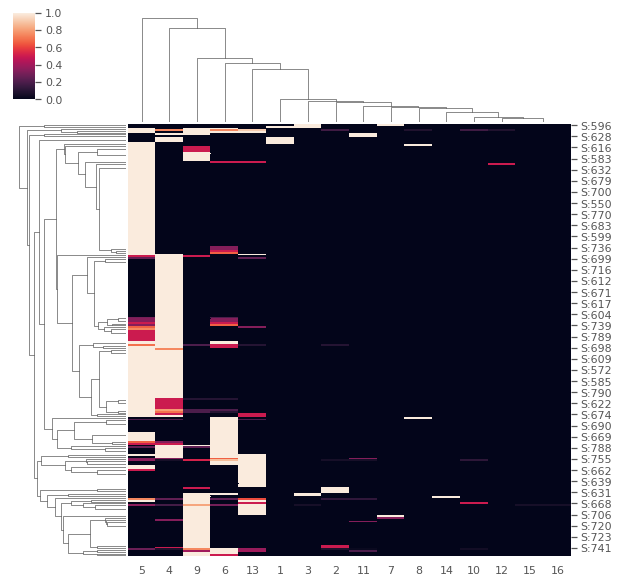

In [88]:
import seaborn as sns; sns.set(color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
mpl.style.use("ggplot")
# plot inline
%matplotlib inline
g = sns.clustermap(cluster_count_term.fillna(0), standard_scale = 0)


In [86]:
# make connection matrix
connection = pd.DataFrame(ont2.connected(), index = ont2.genes + ont2.terms, columns = ont2.genes + ont2.terms)